In [ ]:
# Importa la libreria necessaria
from google.colab import drive

# Monta Google Drive
drive.mount('/content/drive')

In [34]:
encodings = ['utf-8', 'iso-8859-1', 'windows-1252', 'latin1','Windows-1254']

for enc in encodings:
    try:
        df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/betsentiment-IT-tweets-sentiment-players.csv', delimiter='\t', encoding=enc)
        print(f"Successfully read with encoding: {enc}")
        print(df2.head())
        break
    except Exception as e:
        print(f"Failed with encoding: {enc} - Error: {e}")


Failed with encoding: utf-8 - Error: 'utf-8' codec can't decode byte 0x92 in position 59: invalid start byte
Successfully read with encoding: iso-8859-1
           tweet_date_created             tweet_id  \
0  2018-12-10T10:45:40.865000  1072079899224100865   
1  2018-06-30T18:41:02.817000  1013130303454498817   
2  2018-12-26T19:40:44.308000  1078012758069858308   
3  2018-07-12T11:26:37.766000  1017369635816181766   
4         2018-06-12T19:20:36  1006617282779451392   

                                          tweet_text language sentiment  \
0  @juventusfc @G_Higuain Auguri pipita,sempre co...       it   NEUTRAL   
1  @realvarriale @massimozampini @KMbappe @G_Higu...       it   NEUTRAL   
2  @OfficialASRoma @D_10Perotti @Hyundai_Italia S...       it   NEUTRAL   
3  @CarloRienzi @Cristiano @juventusfc Populismo ...       it   NEUTRAL   
4  @OfficialASRoma @OfficialRadja @leonsfdo non c...       it   NEUTRAL   

                                     sentiment_score  
0  {"Neutral":0.

In [32]:
encodings = ['utf-8', 'iso-8859-1', 'windows-1252', 'latin1','Windows-1254']

for enc in encodings:
    try:
        df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/feelit.tsv', delimiter='\t', encoding=enc)
        print(f"Successfully read with encoding: {enc}")
        print(df2.head())
        break
    except Exception as e:
        print(f"Failed with encoding: {enc} - Error: {e}")


Successfully read with encoding: utf-8
                                         clean_tweet    label
0  @USER Adoro questa canzone, è una delle mie pr...      joy
1  #MilanNovara È  arrivato il 3 gol del MILAN ❤🖤...      joy
2  stream icarus falls 🖤 zayn ha un talento ed è ...  sadness
3  Persona di indiscutibile cultura #Daverio avev...  sadness
4  Oggi la direttrice @USER ha spiegato che #COVI...     fear


In [3]:
%matplotlib inline

import pandas as pd
import numpy as np
import nltk
import sys
import re

#Preprocessing Data
>make dataframes of the same structure

>concatenation

>remove_stop_words

>lower_case

>remove_punctuation

>remove_emails/urls

>rimuovi_duplicate_consecutive

first dataframe

In [4]:
import pandas as pd

try:
    df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/feelit.tsv', delimiter='\t', encoding='utf-8')
    df2.head()
except Exception as e:
    print("Error:", e)


In [5]:
df2.columns= ['content', 'sentiment']

In [6]:
df2["sentiment"].replace({"fear": "Negative", "sadness": "Negative",
                        "joy": "Positive", "anger": "Negative"}, inplace=True)
df2['sentiment'].unique()

array(['Positive', 'Negative'], dtype=object)

In [7]:
df2['content'] = [token.lower() for token in df2['content']]
df2.head(5)

,content,sentiment
0,"@user adoro questa canzone, è una delle mie pr...",Positive
1,#milannovara è arrivato il 3 gol del milan ❤🖤...,Positive
2,stream icarus falls 🖤 zayn ha un talento ed è ...,Negative
3,persona di indiscutibile cultura #daverio avev...,Negative
4,oggi la direttrice @user ha spiegato che #covi...,Negative


second dataframe

In [8]:
df1=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/betsentiment-IT-tweets-sentiment-players.csv', encoding='ISO-8859-1')
df1.head()

,tweet_date_created,tweet_id,tweet_text,language,sentiment,sentiment_score
0,2018-12-10T10:45:40.865000,1072079899224100865,"@juventusfc @G_Higuain Auguri pipita,sempre co...",it,NEUTRAL,"{""Neutral"":0.858726024627685546875,""Negative"":..."
1,2018-06-30T18:41:02.817000,1013130303454498817,@realvarriale @massimozampini @KMbappe @G_Higu...,it,NEUTRAL,"{""Neutral"":0.973993778228759765625,""Negative"":..."
2,2018-12-26T19:40:44.308000,1078012758069858308,@OfficialASRoma @D_10Perotti @Hyundai_Italia S...,it,NEUTRAL,"{""Neutral"":0.9844334125518798828125,""Negative""..."
3,2018-07-12T11:26:37.766000,1017369635816181766,@CarloRienzi @Cristiano @juventusfc Populismo ...,it,NEUTRAL,"{""Neutral"":0.993849217891693115234375,""Negativ..."
4,2018-06-12T19:20:36,1006617282779451392,@OfficialASRoma @OfficialRadja @leonsfdo non c...,it,NEUTRAL,"{""Neutral"":0.87245881557464599609375,""Negative..."


In [9]:
columns_to_drop=["tweet_date_created", "tweet_id", "language","sentiment_score"]
df1= df1.drop(columns=columns_to_drop)
df1.head()
# colonnes_da_eliminare = ["tweet_date_created", "tweet_id", "language","sentiment_score"]
# df = df2.drop(columns=colonnes_da_eliminare)


,tweet_text,sentiment
0,"@juventusfc @G_Higuain Auguri pipita,sempre co...",NEUTRAL
1,@realvarriale @massimozampini @KMbappe @G_Higu...,NEUTRAL
2,@OfficialASRoma @D_10Perotti @Hyundai_Italia S...,NEUTRAL
3,@CarloRienzi @Cristiano @juventusfc Populismo ...,NEUTRAL
4,@OfficialASRoma @OfficialRadja @leonsfdo non c...,NEUTRAL


In [10]:
df1['sentiment'].unique()

array(['NEUTRAL', 'POSITIVE', 'MIXED', 'NEGATIVE'], dtype=object)

In [11]:
df1["sentiment"].replace({"NEGATIVE": "Negative","POSITIVE": "Positive"}, inplace = True)

In [12]:
df1.columns= ['content', 'sentiment']

In [13]:
# Seleziona solo i valori positivi e negativi dalla colonna 'sentiment'
df1_filtered = df1.loc[df1['sentiment'].isin(['Positive', 'Negative'])]

# Visualizza il DataFrame risultante
print(df1_filtered)

                                                  content sentiment
11      @LichtsteinerSte @juventusfc Grazie di tutto,#...  Positive
13      Scusami @Cristiano, potresti dirci se oggi arr...  Positive
28      @NonEvoluto @PReina25 @MassMirabelli Max nelle...  Positive
44      @PasquAmatoJ8 @MarioMandzukic9 @G_Higuain @juv...  Positive
45      Nonostante l'odio sportivo verso la @juventusf...  Positive
...                                                   ...       ...
165794  @chrisespo21 @Enrzak @gallobelotti Ma se vi si...  Negative
165796  @clusium16 @paulpogba Molto più contento qua c...  Positive
165798  @KatiaAino @MarioMandzukic9 Speriamo che vinca...  Positive
165801  Meglio essere se stessi che cambiare per gli a...  Positive
165807  @bonucci_leo19 Spero che il tuo piccolo grande...  Positive

[30094 rows x 2 columns]


In [48]:
#df1_filtered.isnull().sum()
df2.isnull().sum()

content      0
sentiment    0
dtype: int64

In [49]:
df1_filtered.shape

(30094, 2)

In [50]:
df2.shape

(2037, 2)

concatenazione dataframe

In [14]:
df = pd.concat([df2,df1_filtered],ignore_index=True)
df.head(5)

,content,sentiment
0,"@user adoro questa canzone, è una delle mie pr...",Positive
1,#milannovara è arrivato il 3 gol del milan ❤🖤...,Positive
2,stream icarus falls 🖤 zayn ha un talento ed è ...,Negative
3,persona di indiscutibile cultura #daverio avev...,Negative
4,oggi la direttrice @user ha spiegato che #covi...,Negative


In [15]:
%pip install emojis

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
import emojis
import nltk
from tqdm import tqdm
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import re

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
def remove_stop_words(text):
    stop_words = set(stopwords.words("italian"))
    text = text.split()
    return " ".join([word for word in text if word not in stop_words])

def lower_case(text):
    return text.lower()

def remove_emojis(text):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def decode_emojis(text):
    return emojis.decode(text)

def remove_punctuation(text):
    return re.sub(r'[^\w\s]','',text)

def remove_emails(text):
    return re.sub(r'([a-z0-9+._-]+@[a-z0-9+._-]+\.[a-z0-9+_-]+)', '', text)  # Remove emails

def remove_urls(text):
    return re.sub(r'(http|https|ftp|ssh)://([\w_-]+(?:(?:\.[\w_-]+)+))([\w.,@?^=%&:/~+#-]*[\w@?^=%&/~+#-])?', '', text)  # Remove URLs

def rimuovi_duplicate_consecutive(text):
    # Utilizza espressione regolare per rimuovere parole duplicate e consecutive
    return re.sub(r'\b(\S+)(?:\s+\1)+\b', r'\1', text)


In [18]:
%pip install tqdm
from tqdm import tqdm

tqdm.pandas(desc="Progress: ")

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
type(df['content'][0])

str

In [21]:
df['preprocessed_content'] = df.content.fillna('').progress_apply(remove_stop_words)
df.preprocessed_content = df.preprocessed_content.progress_apply(decode_emojis)
df.preprocessed_content = df.preprocessed_content.progress_apply(remove_punctuation)
df.preprocessed_content = df.preprocessed_content.progress_apply(remove_emails)
df.preprocessed_content = df.preprocessed_content.progress_apply(remove_urls)
df.preprocessed_content = df.preprocessed_content.progress_apply(lower_case)
df.preprocessed_content = df.preprocessed_content.progress_apply(rimuovi_duplicate_consecutive)
display(df)


Progress: 100%|██████████| 32131/32131 [00:01<00:00, 23564.47it/s]


,content,sentiment,preprocessed_content
0,"@user adoro questa canzone, è una delle mie pr...",Positive,user adoro canzone preferite heart_eyesheart_e...
1,#milannovara è arrivato il 3 gol del milan ❤🖤...,Positive,milannovara arrivato 3 gol milan black_heart d...
2,stream icarus falls 🖤 zayn ha un talento ed è ...,Negative,stream icarus falls black_heart zayn talento i...
3,persona di indiscutibile cultura #daverio avev...,Negative,persona indiscutibile cultura daverio raro don...
4,oggi la direttrice @user ha spiegato che #covi...,Negative,oggi direttrice user spiegato covid__19 rialzo...
...,...,...,...
32126,@chrisespo21 @Enrzak @gallobelotti Ma se vi si...,Negative,chrisespo21 enrzak gallobelotti ma lamentati m...
32127,@clusium16 @paulpogba Molto più contento qua c...,Positive,clusium16 paulpogba molto contento qua dopo se...
32128,@KatiaAino @MarioMandzukic9 Speriamo che vinca...,Positive,katiaaino mariomandzukic9 speriamo vinca davve...
32129,Meglio essere se stessi che cambiare per gli a...,Positive,meglio essere cambiare altri chi apprezza meri...


In [30]:
stopwords.words('italian')

['ad',
 'al',
 'allo',
 'ai',
 'agli',
 'all',
 'agl',
 'alla',
 'alle',
 'con',
 'col',
 'coi',
 'da',
 'dal',
 'dallo',
 'dai',
 'dagli',
 'dall',
 'dagl',
 'dalla',
 'dalle',
 'di',
 'del',
 'dello',
 'dei',
 'degli',
 'dell',
 'degl',
 'della',
 'delle',
 'in',
 'nel',
 'nello',
 'nei',
 'negli',
 'nell',
 'negl',
 'nella',
 'nelle',
 'su',
 'sul',
 'sullo',
 'sui',
 'sugli',
 'sull',
 'sugl',
 'sulla',
 'sulle',
 'per',
 'tra',
 'contro',
 'io',
 'tu',
 'lui',
 'lei',
 'noi',
 'voi',
 'loro',
 'mio',
 'mia',
 'miei',
 'mie',
 'tuo',
 'tua',
 'tuoi',
 'tue',
 'suo',
 'sua',
 'suoi',
 'sue',
 'nostro',
 'nostra',
 'nostri',
 'nostre',
 'vostro',
 'vostra',
 'vostri',
 'vostre',
 'mi',
 'ti',
 'ci',
 'vi',
 'lo',
 'la',
 'li',
 'le',
 'gli',
 'ne',
 'il',
 'un',
 'uno',
 'una',
 'ma',
 'ed',
 'se',
 'perché',
 'anche',
 'come',
 'dov',
 'dove',
 'che',
 'chi',
 'cui',
 'non',
 'più',
 'quale',
 'quanto',
 'quanti',
 'quanta',
 'quante',
 'quello',
 'quelli',
 'quella',
 'quelle',
 'q

#Analyze text

In [22]:
%pip install spacy



In [23]:
%%python -m spacy download it



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 21.6 MB/s eta 0:00:00
⚠ As of spaCy v3.0, shortcuts like 'it' are deprecated. Please use the
full pipeline package name 'it_core_news_sm' instead.
✔ Download and installation successful
You can now load the package via spacy.load('it_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [35]:
 import it_core_news_sm
nlp=it_core_news_sm.load()

 # Definisci una funzione per eseguire l'analisi su una frase
 def analyze_text(text):
     doc = nlp(text)
     return [(w.text, w.pos_) for w in doc]

 # Applica la funzione analyze_text a ciascuna riga del DataFrame df_filtered
 df['Analysis'] = df['content'].apply(analyze_text)
 df['preprocessed_analysis']=df['preprocessed_content'].apply(analyze_text)

 # Visualizza il DataFrame con l'analisi
 print(df.head())

                                             content sentiment  \
0  user adoro questo canzone ãl uno di il mio pre...  Positive   
1  milannovara ã   arrivare il   gol di il milan ...  Positive   
2  stream icarus falls ð zayn avere uno talento e...  Negative   
3  persona di indiscutibile cultura daverio avere...  Negative   
4  oggi il direttrice user avere spiegare che cov...  Negative   

                                preprocessed_content  \
0  user adoro questa canzone ã una delle mie pref...   
1  milannovara ã arrivato il gol del milan âð dic...   
2  stream icarus falls ð zayn ha un talento ed ã ...   
3  persona di indiscutibile cultura daverio aveva...   
4  oggi la direttrice user ha spiegato che covid ...   

                                            Analysis  \
0  [(user, DET), (adoro, NOUN), (questo, DET), (c...   
1  [(milannovara, NOUN), (ã, PRON), (  , SPACE), ...   
2  [(stream, X), (icarus, NOUN), (falls, NOUN), (...   
3  [(persona, NOUN), (di, ADP), (indiscuti

#normalization

In [24]:
#con tqdm
import spacy

# Carica il modello italiano
nlp = spacy.load("it_core_news_sm")

# Funzione per normalizzare una frase
def normalizza_frase(frase):
    doc = nlp(frase)
    # Estrae i lemmi delle parole e li unisce in una frase normalizzata
    normalizzato = " ".join(token.lemma_ for token in doc)
    return normalizzato

# Applica la funzione alla colonna 'content' del DataFrame df
df['preprocessed_content'] = df['preprocessed_content'].progress_apply(normalizza_frase)

# Output del DataFrame con le frasi normalizzate nella colonna 'content'
print(df)


Progress: 100%|██████████| 32131/32131 [10:00<00:00, 53.48it/s]

                                                 content sentiment  \
0      @user adoro questa canzone, è una delle mie pr...  Positive   
1      #milannovara è  arrivato il 3 gol del milan ❤🖤...  Positive   
2      stream icarus falls 🖤 zayn ha un talento ed è ...  Negative   
3      persona di indiscutibile cultura #daverio avev...  Negative   
4      oggi la direttrice @user ha spiegato che #covi...  Negative   
...                                                  ...       ...   
32126  @chrisespo21 @Enrzak @gallobelotti Ma se vi si...  Negative   
32127  @clusium16 @paulpogba Molto più contento qua c...  Positive   
32128  @KatiaAino @MarioMandzukic9 Speriamo che vinca...  Positive   
32129  Meglio essere se stessi che cambiare per gli a...  Positive   
32130  @bonucci_leo19 Spero che il tuo piccolo grande...  Positive   

                                    preprocessed_content  
0      user adoro canzone preferito Heart_eyesheart_e...  
1      milannovara arrivare 3 gol milan b

In [61]:
import spacy

# Carica il modello italiano
nlp = spacy.load("it_core_news_sm")

# Funzione per normalizzare una frase
def normalizza_frase(frase):
    doc = nlp(frase)
    # Estrae i lemmi delle parole e li unisce in una frase normalizzata
    normalizzato = " ".join(token.lemma_ for token in doc)
    return normalizzato

# Applica la funzione alla colonna 'content' del DataFrame df
df['preprocessed_content']= df['preprocessed_content'].apply(normalizza_frase)

# Output del DataFrame con le frasi normalizzate nella colonna 'content'
print(df)


KeyboardInterrupt: 

In [ ]:
# colonnes_da_eliminare = ["tweet_date_created", "tweet_id", "language","sentiment_score"]
# df = df2.drop(columns=colonnes_da_eliminare)
# df.dropna()

In [ ]:
# # Seleziona solo i valori positivi e negativi dalla colonna 'sentiment'
# df_filtered = df2.loc[df['sentiment'].isin(['positive', 'negative'])]

# # Visualizza il DataFrame risultante
# print(df_filtered)

In [ ]:
# # Seleziona solo i valori positivi e negativi dalla colonna 'sentiment'
# df_filtered = df.loc[df['sentiment'].isin(['POSITIVE', 'NEGATIVE'])]

# # Visualizza il DataFrame risultante
# print(df_filtered)

In [ ]:
# df_filtered['sentiment'].replace( { 'POSITIVE' : 'Positive' , 'NEGATIVE' : 'Negative' }, inplace= True)
# df_filtered.head(5)

In [ ]:
# df_filtered['sentiment'].unique()

In [ ]:
# df_filtered['content'] = [token.lower() for token in df_filtered['content']]
# df_filtered.head(5)

#Data visualization

In [25]:
tweet_list = df['content']
negative_list = df[df['sentiment'] == "Negative"]
positive_list = df[df['sentiment'] == "Positive"]

print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))

print()

print("% of positive: ",100*len(positive_list)/len(tweet_list))
print("% of negative: ",100*len(negative_list)/len(tweet_list))

total number:  32131
positive number:  24280
negative number:  7851

% of positive:  75.5656531075908
% of negative:  24.4343468924092


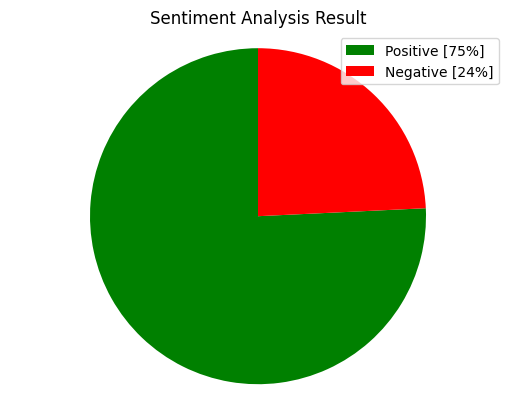

In [26]:
import matplotlib.pyplot as plt

positive = int(100*len(positive_list)/len(tweet_list))
negative = int(100*len(negative_list)/len(tweet_list))

labels = ['Positive ['+str(positive)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, negative]
colors = ['green', 'red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90, radius=50)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result")
plt.axis("equal")
plt.show()

#VISUALIZING TOP WORDS

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [28]:
 common_words = get_top_n_words(df['preprocessed_content'], 20)
 common_df = pd.DataFrame(common_words, columns = ['preprocessed_content', 'count'])
 common_df.head()

,preprocessed_content,count
0,essere,5713
1,grande,4867
2,juventusfc,4479
3,fare,4200
4,il,3894


In [ ]:
#  common_df.groupby('Tweets').sum()['count'].sort_values(ascending=False).plot(
#      kind='bar',
#      figsize=(8, 6),
#      xlabel = "Top Words",
#      ylabel = "Count",
#      title = "Bar Chart of Top Words Frequency")

In [36]:
 def get_top_n_bigram(corpus, n=None):
     vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
     bag_of_words = vec.transform(corpus)
     sum_words = bag_of_words.sum(axis=0)
     words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
     words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
     return words_freq[:n]

 common_words2 = get_top_n_bigram(df['preprocessed_content'], 30)

In [37]:
 top_bigram = pd.DataFrame(common_words2, columns=['preprocessed_content', "Count"])
 top_bigram.head()

,preprocessed_content,Count
0,cristiare juventusfc,562
1,essere grande,535
2,volere bene,476
3,bocca lupo,465
4,juventusfc cristiare,432


##Top Trigrams

In [38]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words3 = get_top_n_trigram(df['preprocessed_content'], 30)
top_trigram = pd.DataFrame(common_words3, columns = ['content' , 'Count'])
#top_trigram_pc = pd.DataFrame(common_words3, columns = ['preprocessed_content' , 'Count'])

top_trigram.head(5)
#top_trigram_pc.head(5)

,content,Count
0,in bocca lupo,270
1,ti volere bene,200
2,kkoulibaly26 essere grande,168
3,kkoulibaly26 sscnapoli lor_insigne,145
4,frenchteam fifaworldcup fifaworldcup_fr,144


In [39]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words3 = get_top_n_trigram(df['preprocessed_content'], 30)
#top_trigram = pd.DataFrame(common_words3, columns = ['content' , 'Count'])
top_trigram_pc = pd.DataFrame(common_words3, columns = ['preprocessed_content' , 'Count'])

#top_trigram.head(5)
top_trigram_pc.head(5)

,preprocessed_content,Count
0,in bocca lupo,270
1,ti volere bene,200
2,kkoulibaly26 essere grande,168
3,kkoulibaly26 sscnapoli lor_insigne,145
4,frenchteam fifaworldcup fifaworldcup_fr,144


<Axes: title={'center': 'Bar chart of Trigrams Frequency'}, xlabel='Trigram Words', ylabel='Count'>

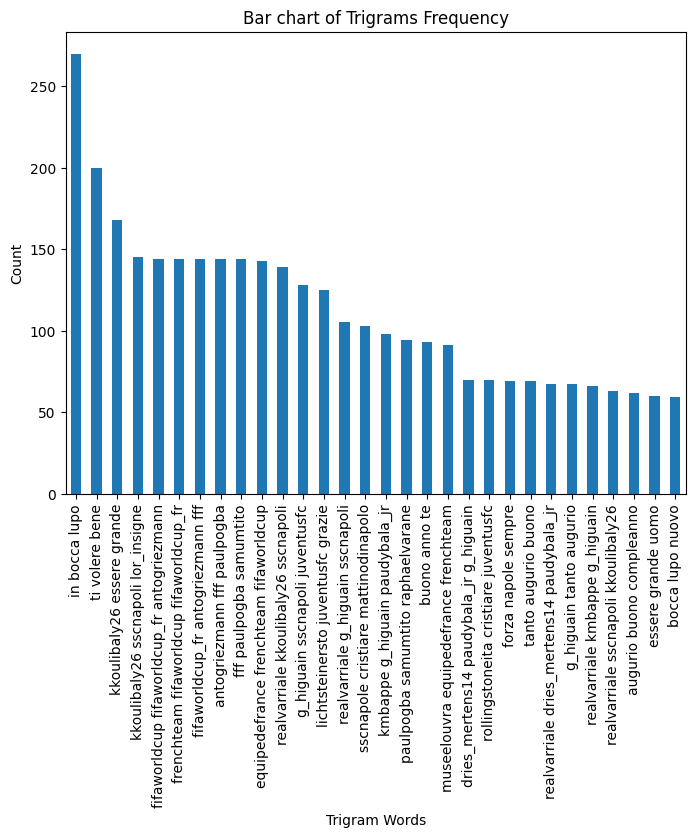

In [40]:
top_trigram.groupby('content').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(8,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency")

#worldcloud

In [41]:
from wordcloud import WordCloud, STOPWORDS

def creat_wordcloud(tweets):
    comment_words = ''
    stopwords = set(STOPWORDS)

    # iterate through the csv file
    for val in tweets:

        # typecaste each val to string
        val = str(val)

        # split the value
        tokens = val.split()

        # Converts each token into lowercase
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()

        comment_words += " ".join(tokens)+" "

    wordcloud = WordCloud(width = 1200, height = 800,
                    background_color ='white',
                    max_words=3000,
                    stopwords = stopwords,
                    min_font_size = 10,
                    repeat = True).generate(comment_words)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

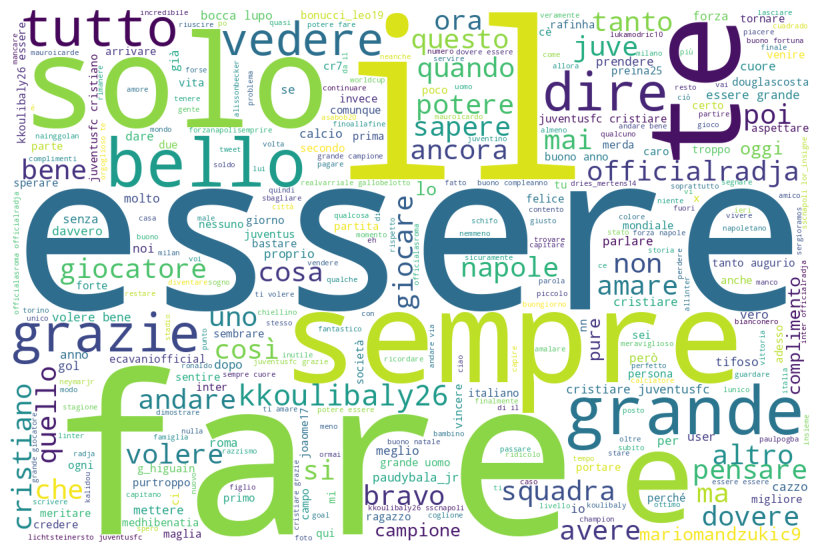

In [42]:
# All Tweets
creat_wordcloud(df['preprocessed_content'].values)

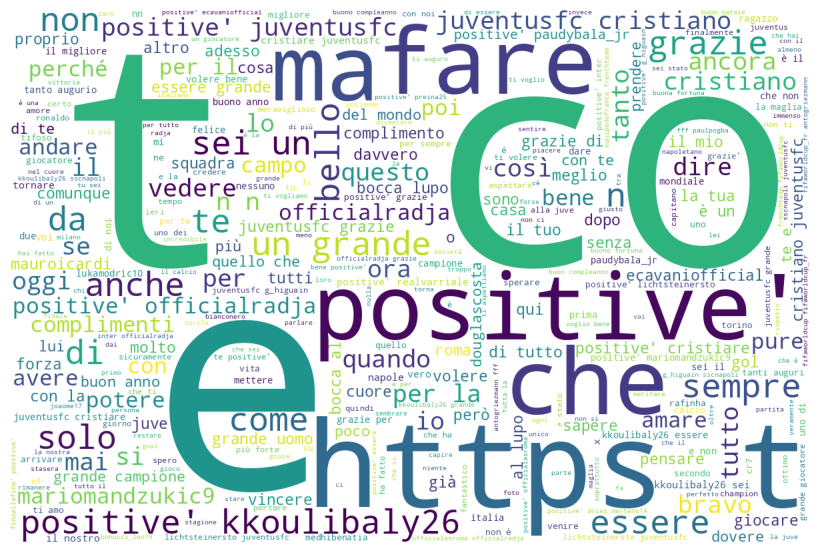

In [43]:
# Positive Tweets
creat_wordcloud(df[df['sentiment'] == 'Positive'].values)

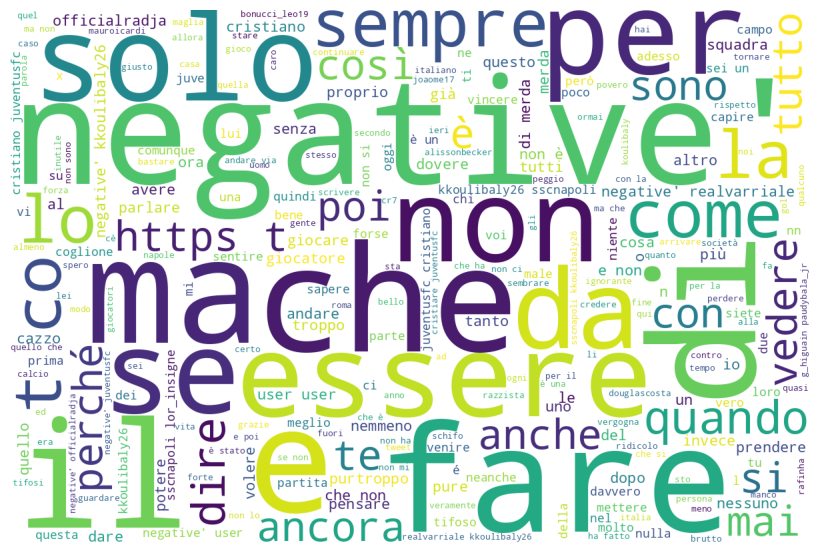

In [44]:
# Negative Tweets
creat_wordcloud(df[df['sentiment'] == 'Negative'].values)

#Word Embeddings

In [45]:
import collections

# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

In [73]:
NB_WORDS = 100000  # Parameter indicating the number of words we'll put in the dictionary
VAL_SIZE = 3000  # Size of the validation set
NB_START_EPOCHS = 10  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
MAX_LEN = 2400  # Maximum number of words in a sequence
GLOVE_DIM = 100  # Number of dimensions of the GloVe word embeddings

In [74]:
def deep_model(model, X_train, y_train, X_valid, y_valid):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])

    history = model.fit(X_train
                       , y_train
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=1)
    return history

def test_model(model, X_train, y_train, X_test, y_test, epoch_stop):
    model.fit(X_train
              , y_train
              , epochs=epoch_stop
              , batch_size=BATCH_SIZE
              , verbose=0)
    results = model.evaluate(X_test, y_test)
    return results

In [75]:
X_train, X_test, y_train, y_test = train_test_split(df.content, df.sentiment, test_size=0.2, random_state=42)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 25704
# Test data samples: 6427


In [76]:
from keras.preprocessing.text import Tokenizer

tk = Tokenizer(num_words=NB_WORDS)
tk.fit_on_texts(X_train)

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

In [77]:
seq_lengths = X_train.apply(lambda x: len(x.split(' ')))
seq_lengths.describe()

count    25704.000000
mean        20.111267
std         13.002281
min          1.000000
25%         10.000000
50%         16.000000
75%         28.000000
max        133.000000
Name: content, dtype: float64

In [78]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [79]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

In [80]:
X_train_emb, X_valid_emb, y_train_emb, y_valid_emb = train_test_split(X_train_seq_trunc, y_train_oh, test_size=0.1, random_state=37)

assert X_valid_emb.shape[0] == y_valid_emb.shape[0]
assert X_train_emb.shape[0] == y_train_emb.shape[0]

print('Shape of validation set:',X_valid_emb.shape)

Shape of validation set: (2571, 2400)


In [81]:
emb_model = models.Sequential()
emb_model.add(layers.Embedding(NB_WORDS, 8, input_length=MAX_LEN))
emb_model.add(layers.Flatten())
emb_model.add(layers.Dense(2, activation='softmax'))
emb_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 2400, 8)           800000    
                                                                 
 flatten_2 (Flatten)         (None, 19200)             0         
                                                                 
 dense_2 (Dense)             (None, 2)                 38402     
                                                                 
Total params: 838402 (3.20 MB)
Trainable params: 838402 (3.20 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [82]:
emb_history = deep_model(emb_model, X_train_emb, y_train_emb, X_valid_emb, y_valid_emb)

Epoch 1/10
46/46 [==============================] - 20s 416ms/step - loss: 0.5708 - accuracy: 0.7550 - val_loss: 0.5813 - val_accuracy: 0.7476
Epoch 2/10
46/46 [==============================] - 19s 415ms/step - loss: 0.5249 - accuracy: 0.7571 - val_loss: 0.5123 - val_accuracy: 0.7476
Epoch 3/10
46/46 [==============================] - 19s 412ms/step - loss: 0.4752 - accuracy: 0.7753 - val_loss: 0.4576 - val_accuracy: 0.7806
Epoch 4/10
46/46 [==============================] - 22s 478ms/step - loss: 0.4209 - accuracy: 0.8021 - val_loss: 0.4114 - val_accuracy: 0.8067
Epoch 5/10
46/46 [==============================] - 15s 322ms/step - loss: 0.3724 - accuracy: 0.8280 - val_loss: 0.3673 - val_accuracy: 0.8238
Epoch 6/10
46/46 [==============================] - 20s 451ms/step - loss: 0.3318 - accuracy: 0.8505 - val_loss: 0.3328 - val_accuracy: 0.8538
Epoch 7/10
46/46 [==============================] - 20s 438ms/step - loss: 0.2973 - accuracy: 0.8714 - val_loss: 0.3040 - val_accuracy: 0.8611

In [84]:
def eval_metric(history, metric_name):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, NB_START_EPOCHS + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

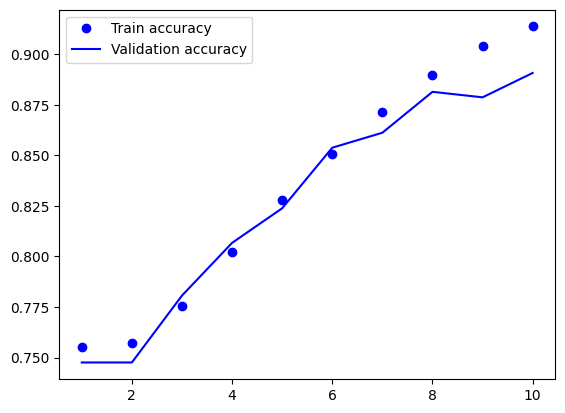

In [85]:
eval_metric(emb_history, 'accuracy')

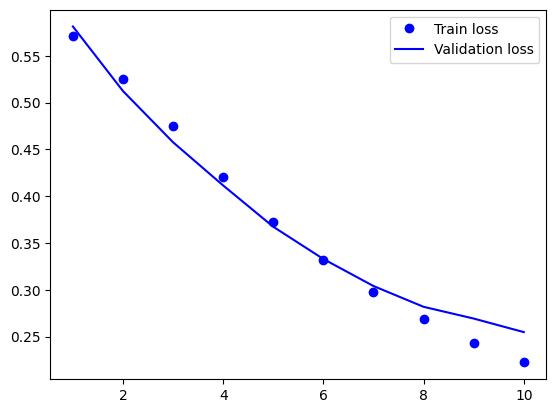

In [86]:
eval_metric(emb_history, 'loss')

In [87]:
emb_results = test_model(emb_model, X_train_seq_trunc, y_train_oh, X_test_seq_trunc, y_test_oh, 6)
print('/n')
print('Test accuracy of word embeddings model: {0:.2f}%'.format(emb_results[1]*100))

201/201 [==============================] - 3s 14ms/step - loss: 0.2112 - accuracy: 0.9135
/n
Test accuracy of word embeddings model: 91.35%


#DATA PREPARATION

In [ ]:
%pip install tensorflow

In [92]:
import collections

# Packages for data preparation
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.sequence import pad_sequences

# Packages for modeling
from keras import models
from keras import layers
from keras import regularizers

In [93]:
NB_WORDS = 38550  # Parameter indicating the number of words we'll put in the dictionary
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent
df = df.sample(2037,random_state=42)
#colonnes_da_eliminare=["Analysis"]
#df_filtered = df_filtered.drop(columns=colonnes_da_eliminare)


In [57]:
df.shape

(2037, 5)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(df.preprocessed_content  , df.sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])
assert X_train.shape[0] == y_train.shape[0]
assert X_test.shape[0] == y_test.shape[0]

# Train data samples: 1833
# Test data samples: 204


In [95]:
tk = Tokenizer()
tk.fit_on_texts(X_train)

print('Fitted tokenizer on {} documents'.format(tk.document_count))
print('{} words in dictionary'.format(tk.num_words))
print('Top 5 most common words are:', collections.Counter(tk.word_counts).most_common(5))

Fitted tokenizer on 1833 documents
None words in dictionary
Top 5 most common words are: [('il', 3178), ('di', 1571), ('a', 983), ('e', 982), ('che', 981)]


In [96]:
X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

# print('"{}" is converted into {}'.format(X_train[0], X_train_seq[0]))

In [97]:
def one_hot_seq(seqs, nb_features = 38550):
    ohs = np.zeros((len(seqs), nb_features))
    for i, s in enumerate(seqs):
        ohs[i, s] = 1.
    return ohs

X_train_oh = one_hot_seq(X_train_seq)
X_test_oh = one_hot_seq(X_test_seq)

# print('"{}" is converted into {}'.format(X_train_seq[0], X_train_oh[0]))
# print('For this example we have {} features with a value of 1.'.format(X_train_oh[0].sum()))

In [98]:
le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.transform(y_test)
y_train_oh = to_categorical(y_train_le)
y_test_oh = to_categorical(y_test_le)

# print('"{}" is converted into {}'.format(y_train[0], y_train_le[0]))
# print('"{}" is converted into {}'.format(y_train_le[0], y_train_oh[0]))

In [99]:
X_train_rest, X_valid, y_train_rest, y_valid = train_test_split(X_train_oh, y_train_oh, test_size=0.1, random_state=37)

assert X_valid.shape[0] == y_valid.shape[0]
assert X_train_rest.shape[0] == y_train_rest.shape[0]

print('Shape of validation set:',X_valid.shape)

Shape of validation set: (184, 38550)


#First model

In [100]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

# Definisci la pipeline per la trasformazione del testo e l'addestramento del modello
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # Utilizza CountVectorizer per convertire il testo in BOW
    ('classifier', LogisticRegression(max_iter=1000))  # Utilizza LogisticRegression come classificatore
])

# Addestra la pipeline sulle features di testo e le etichette
pipeline.fit(X_train, y_train)

# Ottieni le previsioni del modello sui dati di test
y_pred = pipeline.predict(X_test)


In [103]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


# Calcola l'accuratezza utilizzando le etichette predette e le etichette di test effettive
accuracy = accuracy_score(y_test, y_pred)
precision_LR= precision_score(y_test, y_pred, average='weighted' )
classification_report= classification_report(y_test, y_pred)
recall_LR= recall_score(y_test, y_pred,average='weighted')
f1_score_LR=f1_score(y_test, y_pred,average='weighted')
# Stampa l'accuratezza
print("Accuratezza:", accuracy)
print("recall_score:", recall_score)
print("f1:", f1_score)
print("class:", classification_report)
print("precision:", precision_score)

print("\nEvaluation Metrics using lr:")
print("Accuracy:", accuracy)
print("Precision:", precision_LR)
print("Recall:", recall_LR)
print("F1 Score:", f1_score_LR)
print("\nClassification Report using LR:")
print(classification_report)


Accuratezza: 0.7990196078431373
recall_score: <function recall_score at 0x7f264e4d0310>
f1: <function f1_score at 0x7f264e4afe20>
class:               precision    recall  f1-score   support

    Negative       0.79      0.91      0.85       127
    Positive       0.81      0.61      0.70        77

    accuracy                           0.80       204
   macro avg       0.80      0.76      0.77       204
weighted avg       0.80      0.80      0.79       204

precision: <function precision_score at 0x7f264e4d0280>

Evaluation Metrics using lr:
Accuracy: 0.7990196078431373
Precision: 0.8004934378097011
Recall: 0.7990196078431373
F1 Score: 0.7918703663801703

Classification Report using LR:
              precision    recall  f1-score   support

    Negative       0.79      0.91      0.85       127
    Positive       0.81      0.61      0.70        77

    accuracy                           0.80       204
   macro avg       0.80      0.76      0.77       204
weighted avg       0.80      0

In [66]:
X_test.shape

(204,)

#second model

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Definisci il vettorizzatore utilizzando CountVectorizer per convertire il testo in Bag-of-Words
vectorizer = CountVectorizer()

# Trasforma il testo in BOW
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

# Definisci il modello di regressione logistica
model = LogisticRegression(max_iter=1000, solver='saga', tol=1e-3)

# Addestra il modello sui dati di addestramento
model.fit(X_train_bow, y_train)

# Ottieni le previsioni del modello sui dati di test
y_pred = model.predict(X_test_bow)

# Calcola l'accuratezza
#accuracy = accuracy_score(y_test, y_pred)

# Stampa l'accuratezza
#print("Accuratezza:", accuracy)

# Calcola l'accuratezza utilizzando le etichette predette e le etichette di test effettive
accuracy = accuracy_score(y_test, y_pred)
precision_LR= precision_score(y_test, y_pred, average='weighted' )
#classification_report= classification_report(y_test, y_pred)
recall_LR= recall_score(y_test, y_pred,average='weighted')
f1_score_LR=f1_score(y_test, y_pred,average='weighted')
# Stampa l'accuratezza
print("Accuratezza:", accuracy)
print("recall_score:", recall_score)
print("f1:", f1_score)
print("class:", classification_report)
print("precision:", precision_score)

print("\nEvaluation Metrics using lr:")
print("Accuracy:", accuracy)
print("Precision:", precision_LR)
print("Recall:", recall_LR)
print("F1 Score:", f1_score_LR)
print("\nClassification Report using LR:")
#print(classification_report)


Accuratezza: 0.803921568627451
recall_score: <function recall_score at 0x7f264e4d0310>
f1: <function f1_score at 0x7f264e4afe20>
class:               precision    recall  f1-score   support

    Negative       0.79      0.91      0.85       127
    Positive       0.81      0.61      0.70        77

    accuracy                           0.80       204
   macro avg       0.80      0.76      0.77       204
weighted avg       0.80      0.80      0.79       204

precision: <function precision_score at 0x7f264e4d0280>

Evaluation Metrics using lr:
Accuracy: 0.803921568627451
Precision: 0.8067297094276307
Recall: 0.803921568627451
F1 Score: 0.7964449969986905

Classification Report using LR:


In [106]:
df.shape

(2037, 5)

In [108]:
df.head()

,content,sentiment,preprocessed_content,Analysis,preprocessed_analysis
359,questo donna andare espulso dallitalia,Negative,questo donna andare espulso dallitalia,"[(questo, DET), (donna, NOUN), (andare, VERB),...","[(questa, DET), (donna, NOUN), (va, AUX), (esp..."
1971,nomascherina nocervello ormai ã tardi il fritt...,Negative,nomascherina nocervello ormai ã tardi il fritt...,"[(nomascherina, NOUN), (nocervello, ADJ), (orm...","[(nomascherina, NOUN), (nocervello, ADJ), (orm..."
1674,in il dubbio sempre e comunque niallhoranisloved,Positive,in il dubbio sempre e comunque niallhoranisloved,"[(in, ADP), (il, DET), (dubbio, NOUN), (sempre...","[(nel, ADP), (dubbio, NOUN), (sempre, ADV), (e..."
2028,non sapere se mi spaventare piã¹ il tweet o il...,Negative,non sapere se mi spaventare piã¹ il tweet il l...,"[(non, ADV), (sapere, VERB), (se, SCONJ), (mi,...","[(non, ADV), (so, VERB), (se, SCONJ), (mi, PRO..."
807,giorno dopo giorno essere diventare il ragione...,Positive,giorno dopo giorno essere diventare il ragione...,"[(giorno, NOUN), (dopo, ADP), (giorno, NOUN), ...","[(giorno, NOUN), (dopo, ADP), (giorno, NOUN), ..."


In [112]:
print(X_test_bow)

  (0, 636)	1
  (0, 1274)	1
  (0, 2569)	1
  (0, 2905)	1
  (0, 2976)	1
  (0, 3241)	1
  (0, 3781)	1
  (0, 4141)	1
  (0, 4294)	1
  (0, 4491)	1
  (0, 4786)	1
  (0, 4806)	1
  (0, 5087)	1
  (0, 6046)	1
  (0, 7130)	1
  (1, 1151)	1
  (1, 1474)	1
  (1, 1660)	1
  (1, 1800)	1
  (1, 1820)	1
  (1, 2162)	1
  (1, 2499)	1
  (1, 2572)	1
  (1, 2976)	2
  (1, 3037)	1
  :	:
  (201, 5358)	1
  (201, 6958)	1
  (202, 218)	1
  (202, 271)	1
  (202, 1108)	2
  (202, 1493)	1
  (202, 1621)	1
  (202, 1960)	1
  (202, 2895)	1
  (202, 2976)	2
  (202, 3037)	1
  (202, 3259)	1
  (202, 4412)	1
  (202, 4958)	2
  (202, 5105)	1
  (202, 7205)	1
  (203, 265)	1
  (203, 1806)	1
  (203, 1924)	1
  (203, 2246)	1
  (203, 3422)	1
  (203, 4698)	1
  (203, 4806)	1
  (203, 5358)	1
  (203, 7071)	1


#third model

In [ ]:
# to do the accuracy

In [68]:
base_model = models.Sequential()
base_model.add(layers.Dense(64, activation='relu', input_shape=(NB_WORDS,)))
base_model.add(layers.Dense(64, activation='relu'))
base_model.add(layers.Dense(2, activation='softmax'))
base_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2467264   
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 2471554 (9.43 MB)
Trainable params: 2471554 (9.43 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [69]:
NB_START_EPOCHS = 20  # Number of epochs we usually start to train with
BATCH_SIZE = 512  # Size of the batches used in the mini-batch gradient descent

def deep_model(model):
    model.compile(optimizer='rmsprop'
                  , loss='categorical_crossentropy'
                  , metrics=['accuracy'])

    history = model.fit(X_train_rest
                       , y_train_rest
                       , epochs=NB_START_EPOCHS
                       , batch_size=BATCH_SIZE
                       , validation_data=(X_valid, y_valid)
                       , verbose=0)

    return history

In [70]:
base_history = deep_model(base_model)

In [71]:
# Calcola l'accuratezza utilizzando i dati di validazione
accuracy = base_history.history['val_accuracy'][-1]

# Stampa l'accuratezza
print("Accuratezza sul set di validazione:", accuracy)

Accuratezza sul set di validazione: 0.79347825050354


In [72]:
# Ottieni le previsioni del modello sui dati di test
y_pred = base_model.predict(X_test)

# Converti le previsioni in etichette predette
y_pred_labels = np.argmax(y_pred, axis=1)

# Calcola l'accuratezza utilizzando le etichette predette e le etichette di test effettive
accuracy = accuracy_score(y_test, y_pred_labels)

# Stampa l'accuratezza
print("Accuratezza sul set di test:", accuracy)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 38550, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=string)
      • training=False
      • mask=None


In [73]:
eval_metric(base_history, 'loss')

NameError: name 'eval_metric' is not defined

In [77]:
eval_metric(base_history, 'accuracy')

NameError: name 'eval_metric' is not defined

In [75]:
from sklearn.metrics import accuracy_score

# Supponendo che tu abbia già eseguito la previsione e ottenuto le etichette previste
# ad esempio, se hai addestrato un modello chiamato "model" e lo hai usato per fare previsioni su X_test
y_pred = base_model.predict(X_test)

# Calcola l'accuratezza
accuracy = accuracy_score(y_test, y_pred)

# Stampa l'accuratezza
print("Accuratezza:", accuracy)


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "dense" is incompatible with the layer: expected axis -1 of input shape to have value 38550, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=string)
      • training=False
      • mask=None


In [76]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8284313725490197


# TF-IDF and SVM


In [83]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


In [86]:
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1, 3), analyzer='word')
X_tfidf = tfidf.fit_transform(df['preprocessed_content'])
y = df['sentiment']
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

In [ ]:
# Train LinearSVC model using TF-IDF embeddings
clf_tfidf = LinearSVC(C=10, class_weight='balanced')
clf_tfidf.fit(X_train_tfidf, y_train)

# Model evaluation using TF-IDF embeddings
y_pred_tfidf = clf_tfidf.predict(X_test_tfidf)
accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
precision_tfidf = precision_score(y_test, y_pred_tfidf, average='weighted')
recall_tfidf = recall_score(y_test, y_pred_tfidf, average='weighted')
f1_tfidf = f1_score(y_test, y_pred_tfidf, average='weighted')

print("\nEvaluation Metrics using TF-IDF:")
print("Accuracy:", accuracy_tfidf)
print("Precision:", precision_tfidf)
print("Recall:", recall_tfidf)
print("F1 Score:", f1_tfidf)
print("\nClassification Report using TF-IDF:")
print(classification_report(y_test, y_pred_tfidf))

In [113]:
# Examples
examples = [
  ("Oggi il tempo è molto bello.", "positivo"),
    ("Il cibo era delizioso.", "positivo"),
    ("I miei amici sono molto importanti per me.", "positivo"),
    ("Ho amato il mio nuovo libro.", "positivo"),
    ("Questo ristorante era molto brutto.", "negativo"),
    ("Purtroppo, ho ricevuto un feedback negativo dal colloquio di lavoro.", "negativo"),
    ("Ho avuto una brutta giornata oggi.", "negativo"),
    ("Abbiamo dovuto cancellare i nostri piani di vacanza.", "negativo"),
    ("La riparazione dell'auto è stata molto costosa.", "negativo"),
    ("Vivere in questa città è molto piacevole.", "positivo"),
    ("Ho ottenuto un buon voto all'esame.", "positivo"),
    ("Amiamo fare picnic con i nostri figli.", "positivo"),
    ("Ho acquisito un nuovo hobby e sono molto felice.", "positivo"),
    ("Abbiamo avuto una brutta esperienza in questo hotel.", "negativo"),
    ("Il film mi ha profondamente colpito.", "positivo"),
    ("Il nuovo telefono che ho comprato si è rotto rapidamente.", "negativo"),
    ("Il traffico oggi era molto intenso.", "negativo"),
    ("Abbiamo scoperto un nuovo ristorante e ci è piaciuto molto.", "positivo"),
    ("Ho trascorso una bella serata con i miei colleghi oggi.", "positivo")
]





print("\nPredictions using TF-IDF:")
for example, expected_star in examples:
    example_cleaned = remove_stop_words(example)
    example_cleaned = decode_emojis(example_cleaned)
    example_cleaned = remove_punctuation(example_cleaned)
    example_cleaned = remove_emails(example_cleaned)
    example_cleaned = remove_urls(example_cleaned)


    vec = tfidf.transform([example_cleaned])
    predicted_star = clf_tfidf.predict(vec)[0]
    print("Example:", example)
    print("Predicted star rating:", predicted_star)
    print("Expected star rating:", expected_star)
    print()



Predictions using TF-IDF:
Example: Oggi il tempo è molto bello.
Predicted star rating: Positive
Expected star rating: positivo

Example: Il cibo era delizioso.
Predicted star rating: Negative
Expected star rating: positivo

Example: I miei amici sono molto importanti per me.
Predicted star rating: Negative
Expected star rating: positivo

Example: Ho amato il mio nuovo libro.
Predicted star rating: Positive
Expected star rating: positivo

Example: Questo ristorante era molto brutto.
Predicted star rating: Negative
Expected star rating: negativo

Example: Purtroppo, ho ricevuto un feedback negativo dal colloquio di lavoro.
Predicted star rating: Negative
Expected star rating: negativo

Example: Ho avuto una brutta giornata oggi.
Predicted star rating: Positive
Expected star rating: negativo

Example: Abbiamo dovuto cancellare i nostri piani di vacanza.
Predicted star rating: Negative
Expected star rating: negativo

Example: La riparazione dell'auto è stata molto costosa.
Predicted star 